# Task 1 - linear batch correction


In [1]:
import scanpy as sc

In [2]:
# DIFFERENT PER COMPUTER
data_path = '/home/ssm-user/Github/'
rna_filename = 'task1_input_rna.h5ad'

In [3]:
adata = sc.read(data_path + rna_filename)

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata


In [6]:
adata.write(data_path + 'highly_variable.h5ad')

In [27]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'siccaid', 'pSS', 'ssa',
       'percent.mt', 'percent.ribo', 'PoolID', 'nCount_ADT', 'nFeature_ADT',
       'age', 'sex', 'b_tobacco', 'ssb', 'fs', 'fs_detailed', 'b_lymphoma',
       'b_systinvol', 'immune_meds', 'lympho', 'is_pool_GN21', 'is_pool_GN22',
       'is_pool_GN27'],
      dtype='object')

### No batch correction

In [7]:
adata = adata[:, adata.var.highly_variable]


In [8]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])


In [9]:
sc.pp.scale(adata, max_value=10)

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
sc.tl.pca(adata, svd_solver='arpack')

In [11]:
sc.pp.neighbors(adata, n_neighbors=25, n_pcs=25)

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ssm-user/miniconda3/envs/single_cell/lib/python3

In [12]:
sc.tl.umap(adata)


In [25]:
for pool in adata.obs['PoolID'].drop_duplicates():
    adata.obs[f'is_pool_{pool}'] = (adata.obs['PoolID'] == pool).astype('category')

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


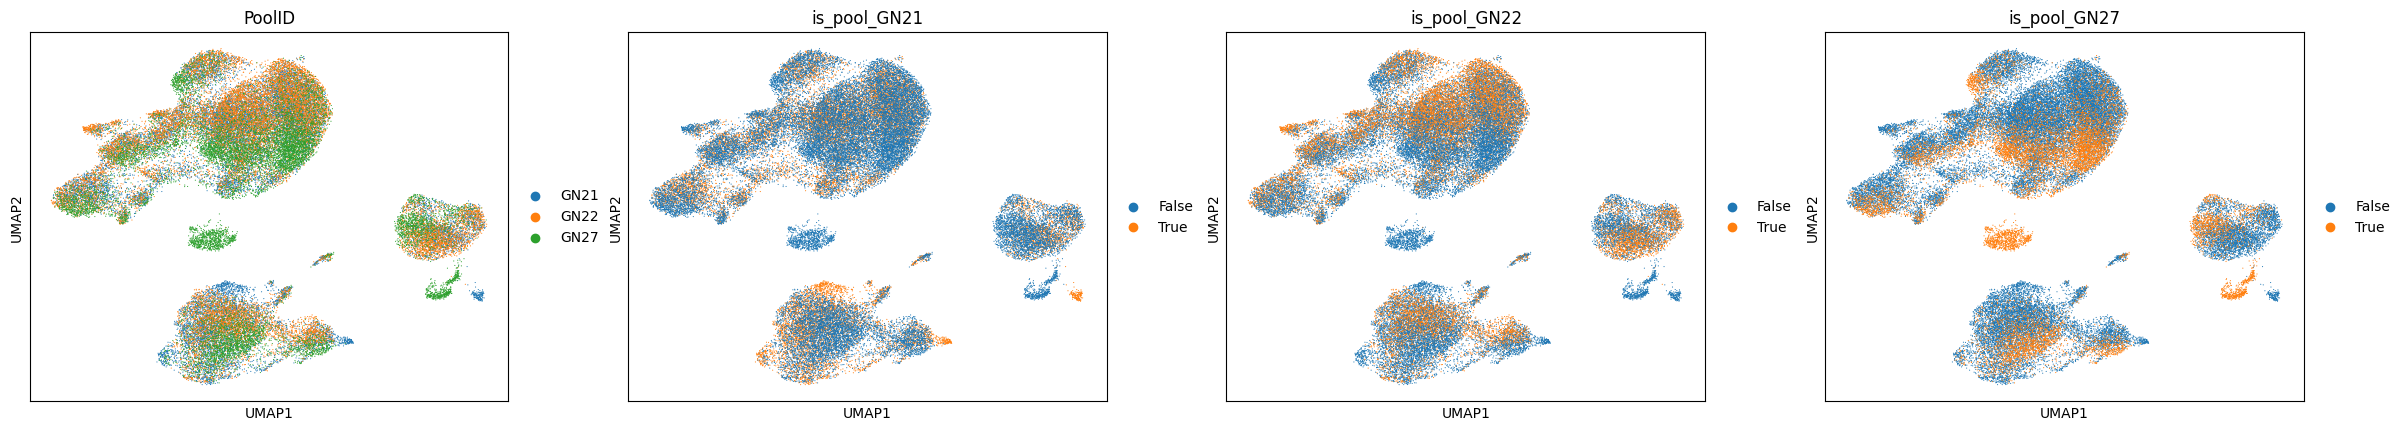

In [26]:
sc.pl.umap(adata, color=['PoolID', 'is_pool_GN21', 'is_pool_GN22', 'is_pool_GN27'])

### Linear batch correction

In [28]:
adata = sc.read(data_path + 'highly_variable.h5ad')

In [30]:
adata = adata[:, adata.var.highly_variable]


In [ ]:
sc.pp.regress_out(adata, ['PoolID'])
